# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №2. Кластерный анализ. </center>

# Часть 1

В данном задании вам необходимо **самостоятельно** реализовать один из алгоритмов кластеризации.  
По аналогии с классами в scikit-learn, нужно реализовать класс, наследуемый от [Base Estimator](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html).  
Подробнее про реализацию своих моделей в scikit-learn: [here](https://scikit-learn.org/stable/developers/develop.html#rolling-your-own-estimator).  
В классе помимо `__init__()` нужно реализовать два метода:
 - `fit()` - метод, выполняющий кластеризацию данных.
 - `predict()` - метод, определяющий для нового объекта, к какому из кластеров он относится. 
 
Для удобства можно создавать дополнительные методы класса, которые будут вызываться в `fit()` или `predict()`.  <br>
Функции для вычисления расстояний *между объектами* самим реализовывать не нужно, используйте реализации из `scipy`.

In [57]:
from scipy.spatial.distance import squareform, pdist, cdist
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial import distance
from scipy.cluster import hierarchy


class AgglomerativeClust(BaseEstimator, ClusterMixin):
    """
    My implementation of clustering algorithm  
    """
    
    def __init__(self, n_clusters=None, metric="euclidean", linkage="single", **kwargs):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.z_ = None
        self.data_ = None
        self.labels_ = None
        self.n_clusters = n_clusters
        ALLOWED_LINKAGE_METHODS = {"single": "min", "complete": "max", "average": "mean"}
        self.is_metric_callable = False
        self.metric = metric

        if callable(metric):
            self.is_metric_callable = True
        elif isinstance(metric, str) and metric in distance.__all__:
            self.is_metric_callable = True
        elif isinstance(metric, np.ndarray) and metric.ndim == 2:
            pass
        else:
            raise Exception("I am so sorry, but param:metric must be either from scipy.spatial.distance "
                            "or callable or ndarray distance matrix.")

        assert isinstance(linkage, str) and linkage in ALLOWED_LINKAGE_METHODS.keys(), f"Linkage must be str from {ALLOWED_LINKAGE_METHODS}"
        self.linkage = ALLOWED_LINKAGE_METHODS[linkage]

    def single(self, d_matrix):
        x = {i: [d] for i, d in enumerate(d_matrix)}

    
    def fit(self, X):
        """
        Use data matrix X to compute model parameters
        """
        if not X.ndim == 2:
            raise Exception("I am so sorry, but only 2-D array allowed!")
        if self.is_metric_callable:
            X = cdist(X, X, metric=self.metric)
        else:
            X = self.metric
        self.z_ = self.linkage_f(X, method=self.linkage)
        if self.n_clusters:
            self.get_labels(self.z_, t=self.n_clusters)

    def get_labels(self, Z, t):
        self.labels_ = np.array([i for i in range(len(Z) + 1)])
        for i in range(round(len(Z) - t + 1)):
                for j in range (len(self.labels_)):
                     if self.labels_[j] == Z[i][1] or self.labels_[j] == Z[i][0]:
                          self.labels_[j] = i

    def merge(self, dict_d_matrix: dict, taboo_cl: list, result: list, len_n: int, method="min"):
        x_ = (0, 0, float("inf"))
        for i, d in dict_d_matrix.items():
            for j, x in enumerate(d):
                if x < x_[2] and i != j and j not in taboo_cl and i not in taboo_cl:
                    x_ = i, j, x
        taboo_cl.append(x_[0])
        taboo_cl.append(x_[1])
        dict_d_matrix[len(dict_d_matrix)] = np.array([])

        count_old_cl = 0
        count_old_cl += result[x_[0] - len_n][3] if x_[0] >= len_n else 1
        count_old_cl += result[x_[1] - len_n][3] if x_[1] >= len_n else 1
        result.append([*x_, count_old_cl])

        for n, i in enumerate(dict_d_matrix[x_[0]]):
            dict_d_matrix[len(dict_d_matrix) - 1] = np.append(dict_d_matrix[len(dict_d_matrix) - 1],
                                                              getattr(np, method)([dict_d_matrix[x_[1]][n], i]))
        dict_d_matrix[len(dict_d_matrix) - 1] = np.append(dict_d_matrix[len(dict_d_matrix) - 1], 0.0)

        for i, d in dict_d_matrix.items():
            if i == len(dict_d_matrix) - 1:
                break
            dict_d_matrix[i] = np.append(d, dict_d_matrix[len(dict_d_matrix) - 1][i])

        return dict_d_matrix, taboo_cl, result

    def linkage_f(self, d_matrix, method="min"):
        d_matrix = squareform(pdist(d_matrix))
        dict_d_matrix = {d_n: d for d_n, d in enumerate(d_matrix)}
        len_n = len(dict_d_matrix)
        taboo_cl = []
        result = []

        for i in range(len_n - 1):
            dict_d_matrix, taboo_cl, result = self.merge(dict_d_matrix, taboo_cl, result, len_n, method)
        return result

    def predict(self, X):
        """
        Using computed model parameters predict cluster
        for all objects from matrix X
        """
        # Your code here
        
        return new_labels
    

In [58]:
from sklearn.cluster import AgglomerativeClustering
not_my = AgglomerativeClustering(3, linkage="single")
my = AgglomerativeClust(3, linkage="single")
X = load_iris(return_X_y=False)
# print(X["data"])
iris = pd.DataFrame(X['data'], columns=X['feature_names'])
not_my.fit(iris)
my.fit(iris)

In [59]:
not_my.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
my.labels_

array([ 42,  42,  42,  70, 137, 122,  28, 122, 133,  70,  28,  39,  27,
       137,  65, 130,  42,  42, 122,  10,  99,  17, 137,  70,  70, 103,
        47, 103, 137,  27,  27,  99,  42,  65,  70, 133,  87,  19,  70,
       122, 137, 144,  70,  47, 103,  42,  10,  42,  28,  99, 113,  63,
       146,  47, 113,  63, 132,   7, 113,  99, 133, 110, 123,  38, 122,
        30,  63,  39, 146,  80,  46,  94, 126, 132, 123,  30, 125, 146,
       146, 101,  80,  80, 144,  74, 126, 125, 125, 146,  34,  47,  83,
        38,  39,   7,  29,  65,  65, 123, 121,  29, 126,  42,  82,  45,
        54,  92, 146,  48, 132, 140,  49,  75,  21,  88, 142, 110,   9,
       122, 143, 127,  57,  91,  92,  53,  87,  82,  65,  65, 133, 131,
        48, 122, 133,  53, 140, 140, 124,   9,  46,  21,  87,  55,  42,
        94,  57,  55, 121,  49, 146,  74])

### Вариант №1  

Алгоритм агломеративной кластеризации.  
  
Параметры: 
- **metric:** Функция расстояния между объектами. Должны поддерживаться метрики из `scipy.spatial.distance`, самописные функции (callable) и предрассчитанная матрица расстояний.  
- **linkage:** Расстояние между кластерами. Должны поддерживаться Single, Complete и Average.  
- **n_clusters:** Число кластеров. По умолчанию должно быть None. 

  
Атрибуты:  
- **z_:** матрица объединений, аналогичная той, что возвращает `linkage()` из `scipy.cluster.hierarchy`;
- **data_:** копия данных, использованных для кластеризации;  
- **labels_:** метки кластеров для каждого объекта.   
  
Дополнительно нужно реализовать метод `get_labels()` для вычисления **labels_**, он должен быть аналогичен [fcluster()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html). <br>
В случае, если **n_clusters** не None, то после вычисления матрицы **z_** в методе `fit()` должен быть вызван `get_labels()` с соответствующими параметрами, и вычислены **labels_**. В других случаях метод `fit()` только вычисляет матрицу **z_**, для вычисления **labels_** нужно явно вызывать `get_labels()`. 
  
Метод `predict()`:  Кластер для нового объекта определяется по методу, заданному в **linkage**.  <br>
**Note:** Метод `predict()` не выполняется в случае, когда **metric** - это матрица расстояний.

### Вариант №2

Алгоритм Dbscan.  
  
Параметры: 
- **eps:** радиус окрестности $\varepsilon$;  
- **min_samples:** минимальное число объектов в окрестности $\varepsilon$ для основных точек;  
- **metric:** функция расстояния между объектами. Должны поддерживаться метрики из `scipy.spatial.distance`, самописные функции (callable) и предрассчитанная матрица расстояний.   
- **metric_params:** параметры функции расстояния, если такие есть. 
  
Атрибуты:  
- **core\_sample\_coords\_:** - векторы основных точек;
- **labels_:** метки кластеров для каждого объекта.
  
Метод `predict()`:  Для нового объекта вычисляется число основных точек из каждого кластера, попавших в окрестность $\varepsilon$. Объект определяется в кластер с наибольшим числом таких точек.  
**Note:** Метод `predict()` не выполняется в случае, когда **metric** - это матрица расстояний. 

### Вариант №3

Алгоритм K-Means.  
  
Параметры: 
- **k:** число центров (кластеров);
- **init**: метод инициализации центров - random или kmeans++;
- **n_init**: число запусков алгоритма;
- **max_iter:** максимальное число итераций;  
- **tol:** минимальное значение изменения целевой функции.  
  
Атрибуты:  
- **inertia_:** Итоговое значение целевой функции;
- **cluster\_centers\_:** центры кластеров - ndarray of shape (n_clusters, n_features);
- **labels_:** метки кластеров для каждого объекта.  
  
Метод `predict()`:  Новый объект определяется в кластер, центр которого расположен ближе всех к этому объекту. 

### Тестирование 

Вашу реализацию необходимо сравнить с питоновской реализацией алгоритма из `sklearn` или `scipy`. Результаты кластеризации должны совпадать.  
Также необходимо сравнить скорость работы вашей реализации и питоновской (это нормально, если ваша реализация будет медленнее).  
Сравнение необходимо выполнить на наборе данных iris.

In [61]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
iris = load_iris()
X = iris.data # использовать для кластеризации
y = iris.target # истинные метки цветков

In [63]:
X = pd.DataFrame(X, columns=iris.feature_names)
X['class'] = [iris.target_names[i] for i in y]

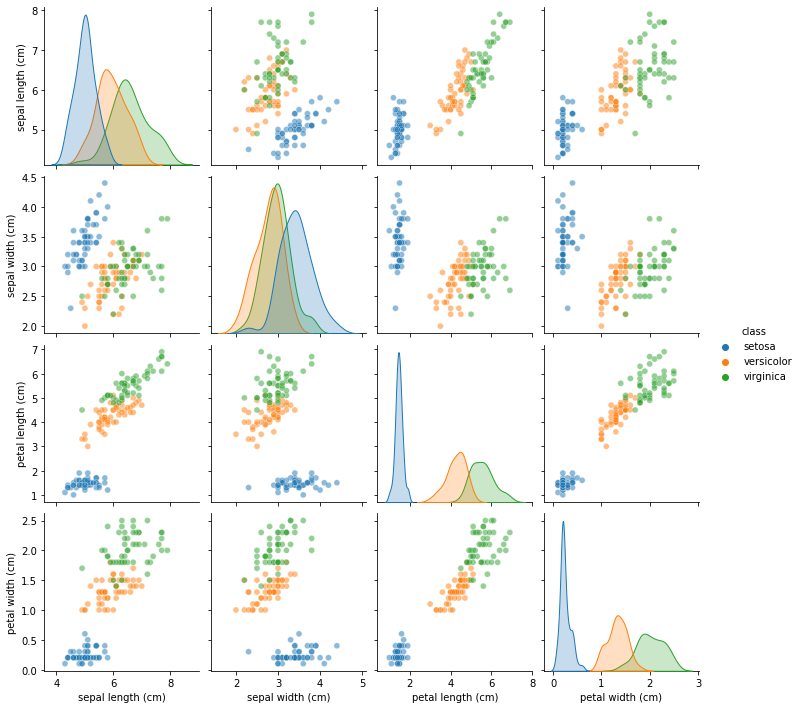

In [64]:
sns.pairplot(X, hue='class', plot_kws={'alpha':0.5}, vars=iris.feature_names)
plt.show()

### Бонусное  
  
Дополнительно вы можете поработать над эффективностью алгоритма по скорости и памяти, добавить поддержку многопоточности, или расширить базовый функционал.

### Распределение по вариантам

In [65]:
pd.set_option('display.max_rows', 50)

In [66]:
Vars = pd.read_csv('Vars.txt', sep='\t')

#### Вариант №1

In [67]:
Vars[Vars.iloc[:,2] == 1]

,ФИО,Группа,Вариант №
0,Бакурский Андрей Сергеевич,1 ИАД,1
2,Бекина Светлана Сергеевна,1 ИАД,1
3,Бекусов Михаил Александрович,1 ИАД,1
9,Конина Татьяна Дмитриевна,1 ИАД,1
11,Лукичева Полина Александровна,1 ИАД,1
12,Моничева Арина Александровна,1 ИАД,1
22,Трухин Егор Сергеевич,1 ИАД,1
23,Шарунов Евгений Александрович,1 ИАД,1
24,Шатилов Виктор Алексеевич,1 ИАД,1
27,Астахова Елизавета Евгеньевна,2 ИАД,1


# Часть 2

В данном задании вам предлагается проанализировать набор данных по различным городам США. Каждый город характеризуется следующими признаками:

In [70]:
pd.set_option('display.max_colwidth', None)

In [71]:
data_desc = pd.read_csv('Data_Description.txt', sep=':')
data_desc

,Attribute,Description
0,Place,"City, state (postal code)"
1,Climate & Terrain,"Very hot and very cold months, seasonal temperature variation, heating- and cooling-degree days, freezing days, zero-degree days, ninety-degree days."
2,Housing,"Utility bills, property taxes, mortgage payments."
3,Health Care & Environment,"Per capita physicians, teaching hospitals, medical schools, cardiac rehabilitation centers, comprehensive cancer treatment centers, hospices, insurance/hospitalization costs index, flouridation of drinking water, air pollution."
4,Crime,"Violent crime rate, property crime rate."
5,Transportation,"Daily commute, public transportation, Interstate highways, air service, passenger rail service."
6,Education,"Pupil/teacher ratio in the public K-12 system, effort index in K-12, accademic options in higher education."
7,The Arts,"Museums, fine arts and public radio stations, public television stations, universities offering a degree or degrees in the arts, symphony orchestras, theatres, opera companies, dance companies, public libraries."
8,Recreation,"Good restaurants, public golf courses, certified lanes for tenpin bowling, movie theatres, zoos, aquariums, family theme parks, sanctioned automobile race tracks, pari-mutuel betting attractions, major- and minor- league professional sports teams, NCAA Division I football and basketball teams, miles of ocean or Great Lakes coastline, inland water, national forests, national parks, or national wildlife refuges, Consolidated Metropolitan Statistical Area access."
9,Economics,"Average household income adjusted for taxes and living costs, income growth, job growth."


### Notes:   
* Для всех признаков, кроме трех, чем выше значение - тем лучше. Для признаков `Housing` и `Crime` - наоборот.
* Признак `Population`- статистический признак, не имеющий интерпретации как “лучше-хуже”.
* Признак `Place` - уникальный идентификатор объекта (города), он не должен использоваться при кластеризации.
* Также в данных присутствуют географические координаты городов - `Longitude` и `Latitude`. Их также не следует использовать при кластеризации данных.

In [79]:
data = pd.read_csv('Data.txt', sep=' ')
data

,Place,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Long,Lat,Pop
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633,-99.6890,32.5590,110932
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350,-81.5180,41.0850,660328
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250,-84.1580,31.5750,112402
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864,-73.7983,42.7327,835880
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727,-106.6500,35.0830,419700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,"Worcester,MA",562,8715,1805,680,3643,3299,1784,910,5040,-71.7950,42.2720,402918
325,"Yakima,WA",535,6440,317,1106,3731,2491,996,2140,4986,-120.5130,46.5950,172508
326,"York,PA",540,8371,713,440,2267,2903,1022,842,4946,-76.7280,39.9600,381255
327,"Youngstown-Warren,OH",570,7021,1097,938,3374,2920,2797,1327,3894,-80.7290,41.1700,531350


<br>  
  
## Задания: 

1. Выполните необходимую предобработку данных. Перед кластеризацией исключите из данных признаки `Place`, `Long` и `Lat`.  
  
  
2. Выполните кластеризацию иерархическим методом.  
Рассмотрите различные расстояния между объектами. Определите, какие следует использовать при кластеризации.  
Выполните кластеризацию с различными расстояниями между кластерами. Сравните результаты, сделайте выводы. 
  
  
3. Выполните кластеризацию методом Dbscan. Используйте расстояния между объектами, определенные в предыдущем пункте.  
Реализуйте эвристику (см. лекции) для выбора параметров алгоритма. Подберите подходящие параметры алгоритма.  
  
  
4. Выполните кластеризацию методом kmeans. Определите наилучшее (на ваш взгляд) число кластеров.  
  
  
5. (Бонусное) Выполните кластеризацию другими методами. Например, [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/) или алгоритмы, [реализованные](https://scikit-learn.org/stable/modules/clustering.html) в scikit-learn.  
  
  
6. В результате выполнения предыдущих пунктов вы должны получить 4 или больше разбиений объектов (по одному на каждый метод). Сравните их между собой, сделайте выводы о сходствах и различиях.  
Оцените результаты каждой кластеризации, используя метрики, рассмотренные на занятиях (Silhouette и прочие).  
  
  
7. Выберите одно разбиение, наиболее подходящее на ваш взгляд. Предложите интерпретацию полученным кластерам или покажите, что этого сделать нельзя.  
  
  
8. Оцените, как полученные кластеры распределены географически.  
Оцените, как полученные кластеры распределены по штатам. Можно ли выделить какую-то зависимость (территориальную или для штатов)?  
(Бонусное) [Провизуализируйте](https://python-visualization.github.io/folium/quickstart.html) распределение на карте США.

## Задание 1:

In [81]:
new_data = data.drop(['Lat', 'Long', 'Place'], axis=1)

In [83]:
sc = StandardScaler()
X_train = sc.fit_transform(new_data)
X_train= pd.DataFrame(data=X_train, columns=new_data.columns.tolist())
X_train

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ,Pop
0,-0.147006,-0.901297,-0.947340,-0.106712,-0.123592,-0.180726,-0.464893,-0.546646,1.946433,-0.460990
1,0.300664,-0.087570,0.469568,-0.210467,0.464411,-1.176652,0.520604,0.974442,-1.085467,0.154950
2,-0.586386,-0.423054,-0.566902,0.025084,-1.158809,-0.795765,-0.628640,-1.223512,-0.254304,-0.459342
3,-0.520064,-0.184142,0.244900,-0.984419,1.844699,1.823613,0.324497,-0.283834,0.312735,0.351765
4,0.997040,0.019500,0.666278,1.463626,1.620402,0.659098,0.290194,0.949648,0.186213,-0.114824
...,...,...,...,...,...,...,...,...,...,...
324,0.192892,0.154701,0.618348,-0.788127,-0.391369,1.511411,-0.294891,-1.160288,-0.448242,-0.133638
325,-0.030943,-0.800525,-0.867458,0.406452,-0.330636,-1.011185,-0.464893,0.364519,-0.498112,-0.391956
326,0.010508,0.010262,-0.472042,-1.461129,-1.341007,0.275089,-0.459284,-1.244586,-0.535052,-0.157925
327,0.259213,-0.556575,-0.088608,-0.064649,-0.577017,0.328164,-0.076347,-0.643341,-1.506590,0.010350


## Задание 2:

In [95]:
import scipy.cluster.hierarchy as h
import warnings


/home/victor/PycharmProjects/IAD_LAB_2/venv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/victor/PycharmProjects/IAD_LAB_2/venv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/victor/PycharmProjects/IAD_LAB_2/venv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/victor/PycharmProjects/IAD_LAB_2/venv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/victor/PycharmProjects/IAD_LAB_2/venv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


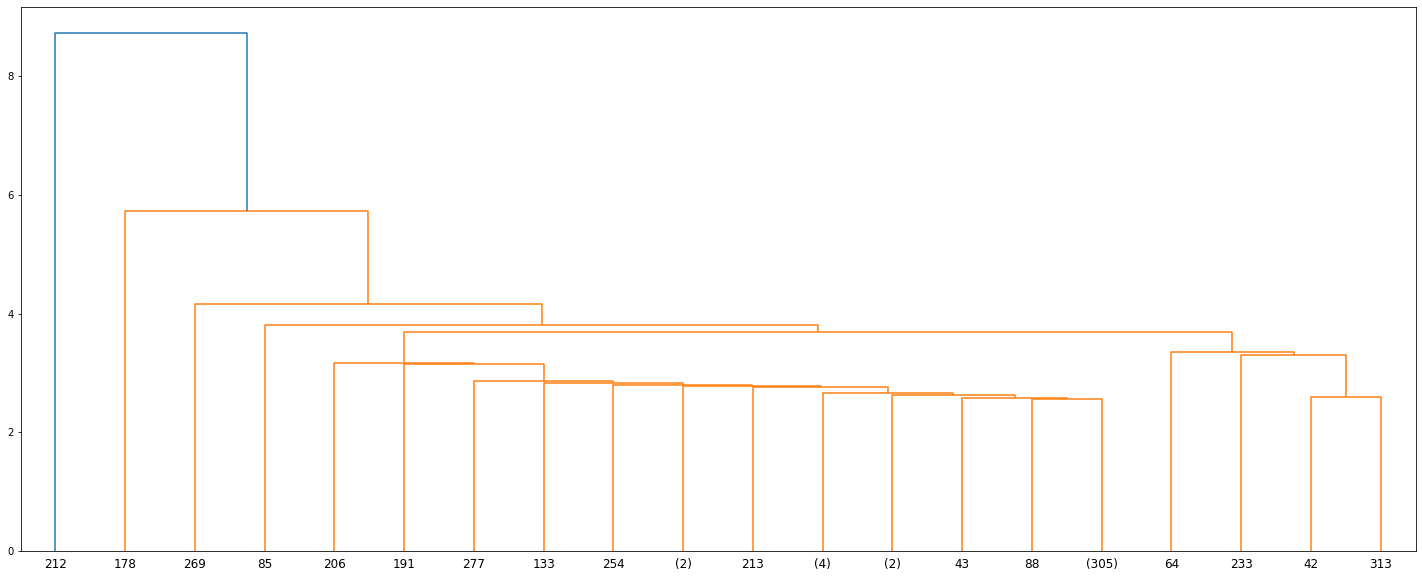

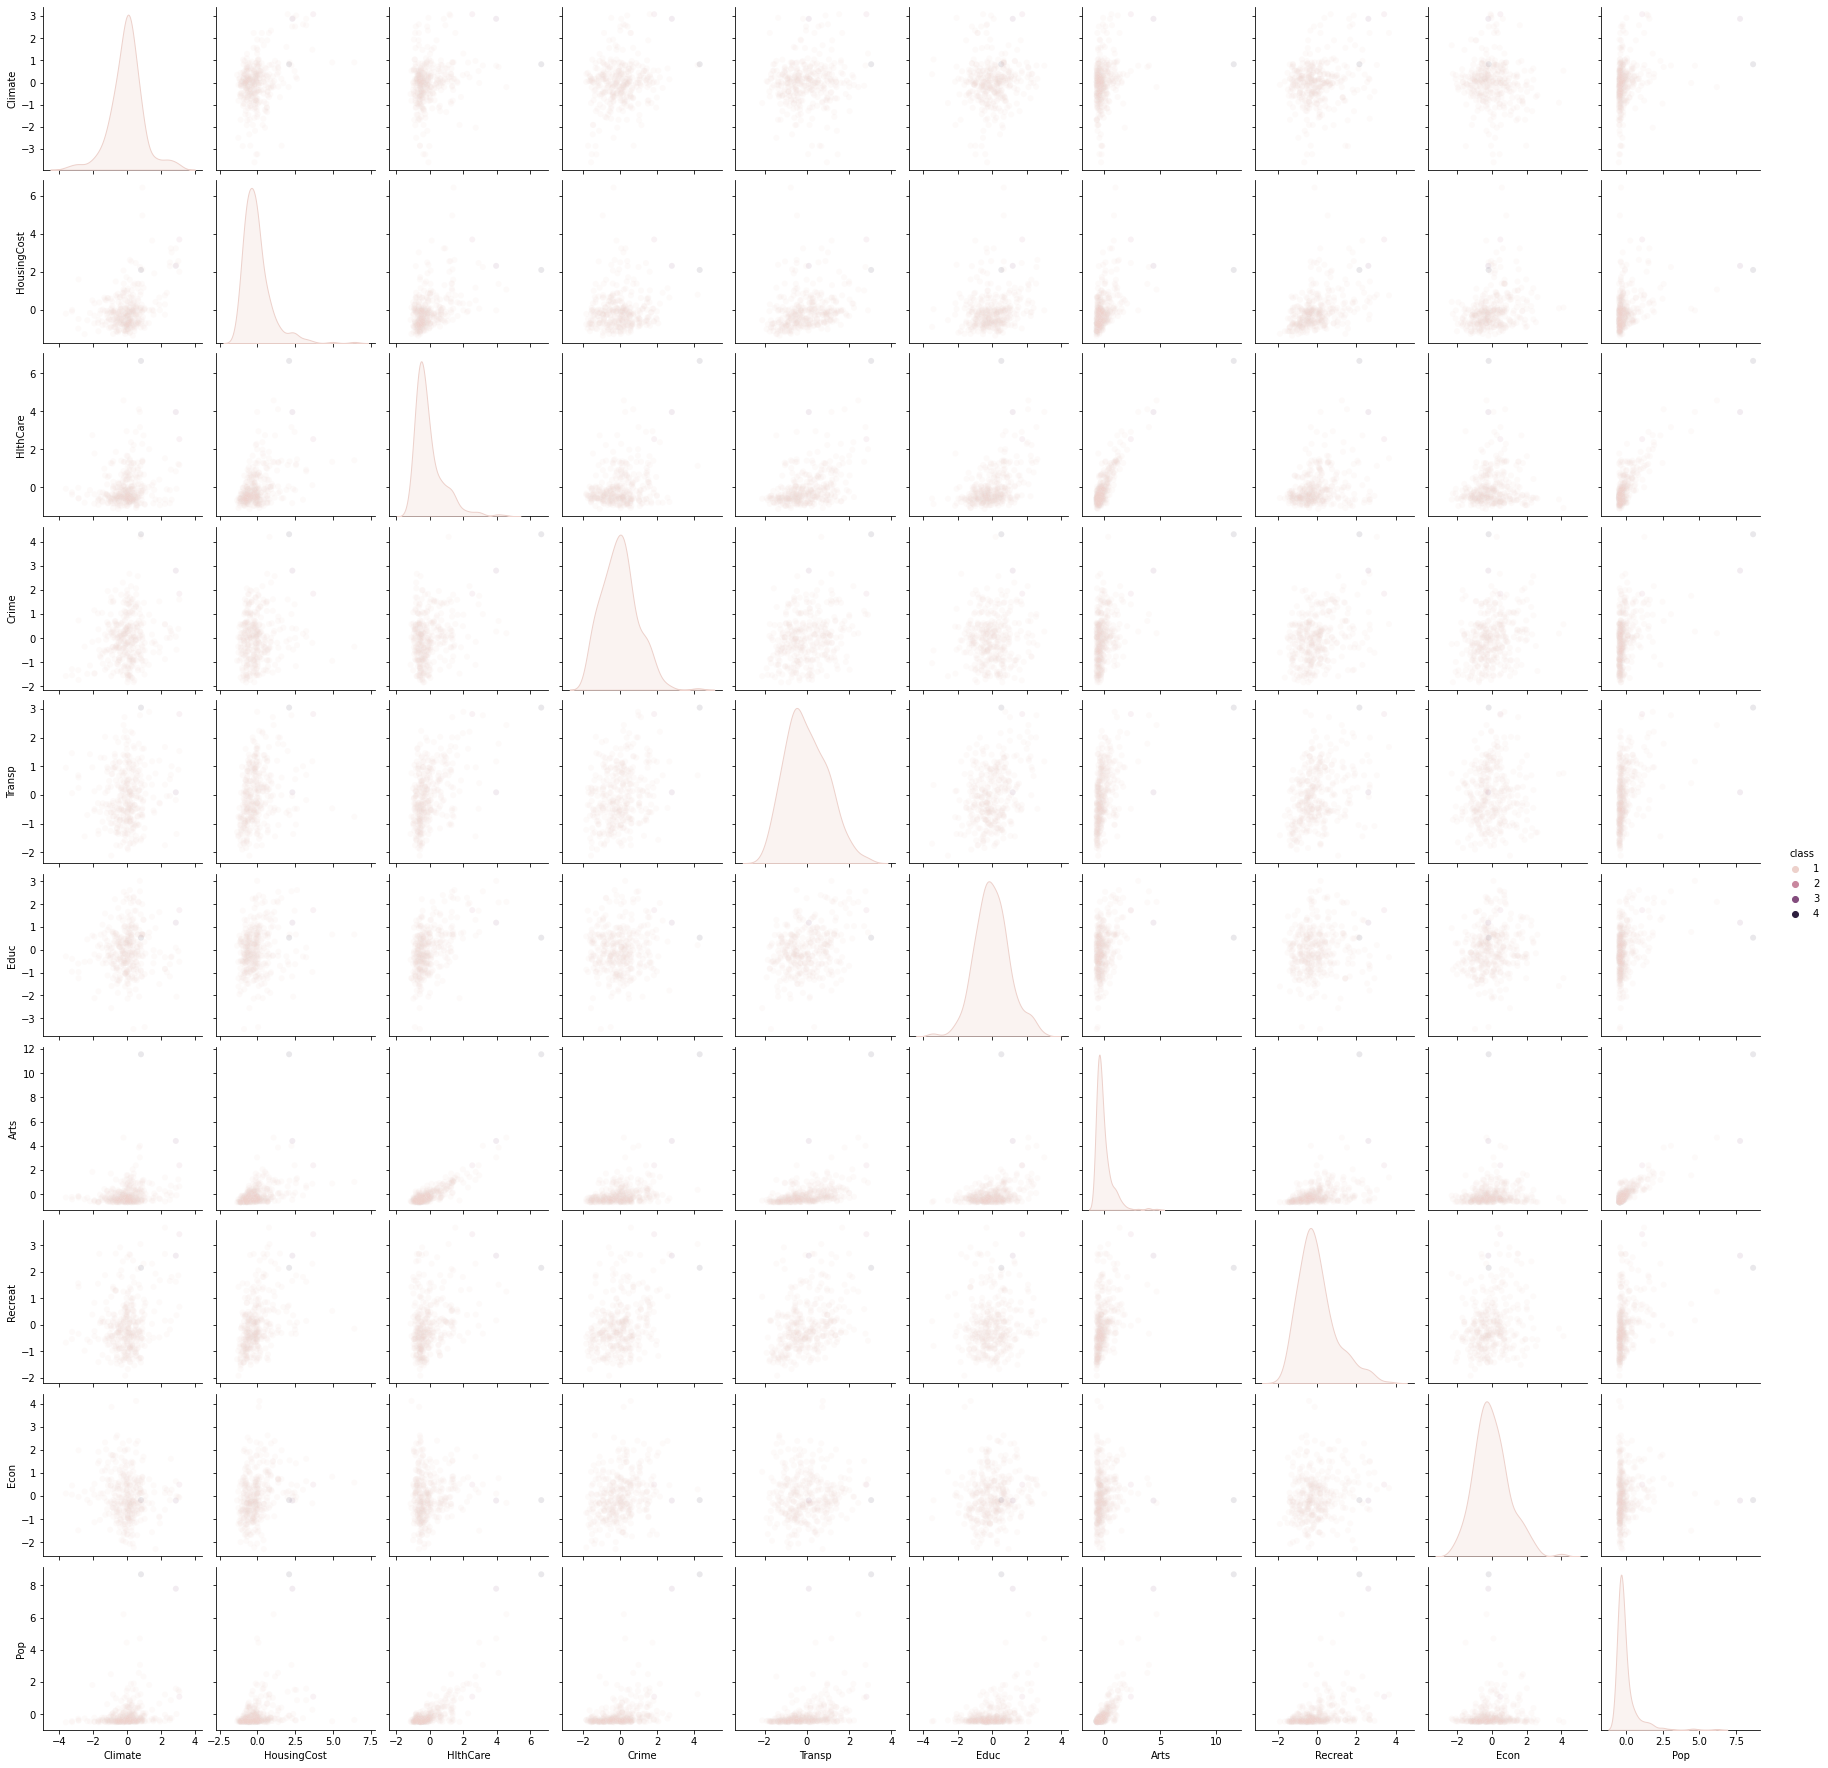

In [97]:
warnings.simplefilter('always', category=UserWarning)
h_clustering = h.linkage(X_train, method='single', metric='euclidean')
plt.figure(figsize=(25,10))
h.dendrogram(h_clustering, p=20,truncate_mode="lastp")
l = h.fcluster(h_clustering, t=4, criterion='maxclust')
X_train['class'] = l
sns.pairplot(X_train, hue='class', plot_kws={'alpha': 0.1})
plt.show()